In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv("./4개지역_FLOW_AGE_201902.CSV",sep="|")

In [3]:
train_df.head()

,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,MAN_FLOW_POP_CNT_0004,MAN_FLOW_POP_CNT_0509,MAN_FLOW_POP_CNT_1014,MAN_FLOW_POP_CNT_1519,MAN_FLOW_POP_CNT_2024,MAN_FLOW_POP_CNT_2529,...,WMAN_FLOW_POP_CNT_2529,WMAN_FLOW_POP_CNT_3034,WMAN_FLOW_POP_CNT_3539,WMAN_FLOW_POP_CNT_4044,WMAN_FLOW_POP_CNT_4549,WMAN_FLOW_POP_CNT_5054,WMAN_FLOW_POP_CNT_5559,WMAN_FLOW_POP_CNT_6064,WMAN_FLOW_POP_CNT_6569,WMAN_FLOW_POP_CNT_70U
0,201902,20190201,1114052000,소공동,16.64,116.18,419.70,1553.57,5196.07,11195.62,...,13323.19,12741.15,11628.80,10006.80,9807.06,8099.38,7260.17,5757.53,3359.85,4431.71
1,201902,20190202,1114052000,소공동,3.14,141.07,763.30,1405.29,4235.82,7592.34,...,7898.27,6580.27,5714.75,4946.22,5055.32,4560.27,4364.57,3838.77,2453.97,3207.26
2,201902,20190203,1114052000,소공동,1.38,120.39,698.23,1117.17,3032.90,5173.35,...,5079.63,4454.43,3905.32,3484.47,3703.24,3270.26,2984.05,2484.98,1511.67,1954.98
3,201902,20190204,1114052000,소공동,0.08,141.61,772.41,1248.85,3001.95,4641.82,...,4317.63,3676.47,3506.37,3108.99,3324.07,2841.35,2644.42,2164.35,1230.21,1520.35
4,201902,20190205,1114052000,소공동,0.00,254.70,1394.92,2190.69,3420.15,5478.30,...,4813.86,4967.92,5161.96,4856.63,5212.69,4462.94,4183.38,3265.62,1692.74,2147.09


In [47]:
#train_df.columns = ['STD_YM','STD_YMD','HDONG_CD','HDONG_NM','M_0004','M_0509','M_1014','M_1519','M_2024','M_2529','','','','','','','','','','',
                    #'','','','','','','','','','','','','','','',]

전처리 해야할 것
1. 데이터 스케일링
2. 데이터 나누기(슬라이스) - 남자/여자 성별로, 나이대 별로, 년도 별로, 각 년도 동월 기준으로.
3. 그래프 그리기

In [29]:
base_df = train_df[["STD_YM","STD_YMD","HDONG_CD","HDONG_NM"]]
base_df

,STD_YM,STD_YMD,HDONG_CD,HDONG_NM
0,201902,20190201,1114052000,소공동
1,201902,20190202,1114052000,소공동
2,201902,20190203,1114052000,소공동
3,201902,20190204,1114052000,소공동
4,201902,20190205,1114052000,소공동
...,...,...,...,...
1927,201902,20190224,2726069000,고산3동
1928,201902,20190225,2726069000,고산3동
1929,201902,20190226,2726069000,고산3동
1930,201902,20190227,2726069000,고산3동


In [42]:
age04_df = pd.concat([base_df,train_df[["MAN_FLOW_POP_CNT_0004","WMAN_FLOW_POP_CNT_0004"]]], axis=1)
age04_df

,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,MAN_FLOW_POP_CNT_0004,WMAN_FLOW_POP_CNT_0004
0,201902,20190201,1114052000,소공동,16.64,2.18
1,201902,20190202,1114052000,소공동,3.14,6.71
2,201902,20190203,1114052000,소공동,1.38,0.99
3,201902,20190204,1114052000,소공동,0.08,0.05
4,201902,20190205,1114052000,소공동,0.00,1.48
...,...,...,...,...,...,...
1927,201902,20190224,2726069000,고산3동,0.05,0.00
1928,201902,20190225,2726069000,고산3동,0.05,0.00
1929,201902,20190226,2726069000,고산3동,0.03,0.00
1930,201902,20190227,2726069000,고산3동,0.08,0.00


In [48]:
age09_df = pd.concat([base_df,train_df[["MAN_FLOW_POP_CNT_0509","WMAN_FLOW_POP_CNT_0509"]]], axis=1)
age14_df = pd.concat([base_df,train_df[["MAN_FLOW_POP_CNT_1014","WMAN_FLOW_POP_CNT_1014"]]], axis=1)
age19_df = pd.concat([base_df,train_df[["MAN_FLOW_POP_CNT_1519","WMAN_FLOW_POP_CNT_1519"]]], axis=1)
age24_df = pd.concat([base_df,train_df[["MAN_FLOW_POP_CNT_2024","WMAN_FLOW_POP_CNT_2024"]]], axis=1)
age29_df = pd.concat([base_df,train_df[["MAN_FLOW_POP_CNT_2529","WMAN_FLOW_POP_CNT_2529"]]], axis=1)
age34_df = pd.concat([base_df,train_df[["MAN_FLOW_POP_CNT_3034","WMAN_FLOW_POP_CNT_3034"]]], axis=1)
age39_df = pd.concat([base_df,train_df[["MAN_FLOW_POP_CNT_3539","WMAN_FLOW_POP_CNT_3539"]]], axis=1)
age44_df = pd.concat([base_df,train_df[["MAN_FLOW_POP_CNT_4044","WMAN_FLOW_POP_CNT_4044"]]], axis=1)
age49_df = pd.concat([base_df,train_df[["MAN_FLOW_POP_CNT_4549","WMAN_FLOW_POP_CNT_4549"]]], axis=1)
age54_df = pd.concat([base_df,train_df[["MAN_FLOW_POP_CNT_5054","WMAN_FLOW_POP_CNT_5054"]]], axis=1)
age59_df = pd.concat([base_df,train_df[["MAN_FLOW_POP_CNT_5559","WMAN_FLOW_POP_CNT_5559"]]], axis=1)
age64_df = pd.concat([base_df,train_df[["MAN_FLOW_POP_CNT_6064","WMAN_FLOW_POP_CNT_6064"]]], axis=1)
age69_df = pd.concat([base_df,train_df[["MAN_FLOW_POP_CNT_6569","WMAN_FLOW_POP_CNT_6569"]]], axis=1)
age70U_df = pd.concat([base_df,train_df[["MAN_FLOW_POP_CNT_70U","WMAN_FLOW_POP_CNT_70U"]]], axis=1)

<AxesSubplot:>

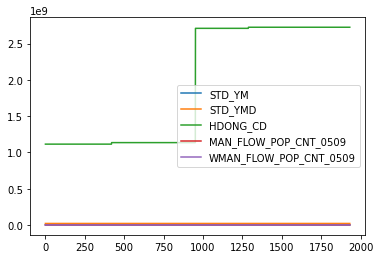

In [56]:
age09_df.plot()

In [71]:
age_man = train_df[["STD_YM","STD_YMD","HDONG_CD","HDONG_NM","MAN_FLOW_POP_CNT_0509","MAN_FLOW_POP_CNT_1014",
                   "MAN_FLOW_POP_CNT_1519","MAN_FLOW_POP_CNT_2024","MAN_FLOW_POP_CNT_2529","MAN_FLOW_POP_CNT_3034",
                   "MAN_FLOW_POP_CNT_3539","MAN_FLOW_POP_CNT_4044","MAN_FLOW_POP_CNT_4549","MAN_FLOW_POP_CNT_5054",
                   "MAN_FLOW_POP_CNT_5559","MAN_FLOW_POP_CNT_6064","MAN_FLOW_POP_CNT_6569","MAN_FLOW_POP_CNT_70U"]]
age_woman = train_df[["STD_YM","STD_YMD","HDONG_CD","HDONG_NM","WMAN_FLOW_POP_CNT_0509","WMAN_FLOW_POP_CNT_1014",
                   "WMAN_FLOW_POP_CNT_1519","WMAN_FLOW_POP_CNT_2024","WMAN_FLOW_POP_CNT_2529","WMAN_FLOW_POP_CNT_3034",
                   "WMAN_FLOW_POP_CNT_3539","WMAN_FLOW_POP_CNT_4044","WMAN_FLOW_POP_CNT_4549","WMAN_FLOW_POP_CNT_5054",
                   "WMAN_FLOW_POP_CNT_5559","WMAN_FLOW_POP_CNT_6064","WMAN_FLOW_POP_CNT_6569","WMAN_FLOW_POP_CNT_70U"]]

In [91]:
X1 = train_df[["STD_YMD","HDONG_NM","MAN_FLOW_POP_CNT_0509"]]
X1[:29]
#plt.show()

,STD_YMD,HDONG_NM,MAN_FLOW_POP_CNT_0509
0,20190201,소공동,116.18
1,20190202,소공동,141.07
2,20190203,소공동,120.39
3,20190204,소공동,141.61
4,20190205,소공동,254.70
5,20190206,소공동,146.26
6,20190207,소공동,88.41
7,20190208,소공동,113.71
8,20190209,소공동,204.35
9,20190210,소공동,169.54
